In [21]:
from training.config_training import config
import numpy as np
import pandas
import os

In [2]:
alllabelfiles = config['stage1_annos_path']
alllabelfiles

['./detector/labels/label_job5.csv',
 './detector/labels/label_job4_2.csv',
 './detector/labels/label_job4_1.csv',
 './detector/labels/label_job0.csv',
 './detector/labels/label_qualified.csv']

In [14]:
tmp = []
for f in alllabelfiles:
    f = os.path.join(os.getcwd(), 'training', f)
    content = np.array(pandas.read_csv(f))
    content = content[content[:,0]!=np.nan]
    tmp.append(content[:,:5])
alllabel = np.concatenate(tmp,0)

In [16]:
alllabel.shape

(2236, 5)

See a sample annotation

In [20]:
alllabel[-1]

array(['9e922147900b3984c9345bdda573e882', 381.662, 372.0986, 97.0,
       9.5079], dtype=object)

In [22]:
filelist = os.listdir(config['stage1_data_path'])
filelist

['0015ceb851d7251b8f399e39779d1e7d',
 '0030a160d58723ff36d73f41b170ec21',
 '003f41c78e6acfa92430a057ac0b306e',
 '006b96310a37b36cccb2ab48d10b49a3',
 '008464bb8521d09a42985dd8add3d0d2',
 '0092c13f9e00a3717fdc940641f00015',
 '00986bebc45e12038ef0ce3e9962b51a',
 '00cba091fa4ad62cc3200a657aeb957e',
 '00edff4f51a893d80dae2d42a7f45ad1']

In [23]:
for label in alllabel:
    if label[0] in filelist:
        print(label)

['0030a160d58723ff36d73f41b170ec21' 117.9563 156.4961 126 22.2551]
['0030a160d58723ff36d73f41b170ec21' 112.0429 116.919 113
 10.344000000000001]
['003f41c78e6acfa92430a057ac0b306e' 0.0 0.0 0 -1.0]
['0092c13f9e00a3717fdc940641f00015' 201.5777 194.2784 96 25.9282]
['00986bebc45e12038ef0ce3e9962b51a' 0.0 0.0 0 -1.0]
['00cba091fa4ad62cc3200a657aeb957e' 115.2857 139.5495 70 10.7641]
['00cba091fa4ad62cc3200a657aeb957e' 111.1147 187.7248 68 16.6603]
['00cba091fa4ad62cc3200a657aeb957e' 68.1571 314.4048 31 14.8304]
['0015ceb851d7251b8f399e39779d1e7d' 0.0 0.0 0.0 0.0]
['006b96310a37b36cccb2ab48d10b49a3' 0.0 0.0 0.0 0.0]
['008464bb8521d09a42985dd8add3d0d2' 102.7163 296.9362 110.0 13.3988]
['00edff4f51a893d80dae2d42a7f45ad1' 0.0 0.0 0.0 0.0]


In [28]:
prep_folder = config['preprocess_result_path']
data_path = config['stage1_data_path']
annos= alllabel
# filelist=filelist
# Just preprocess one patient for demo.
filelist = ['0030a160d58723ff36d73f41b170ec21']
data_path=data_path
prep_folder=prep_folder

In [29]:
prep_folder

'F:\\LargeFiles\\lfz\\prep_result\\'

In [30]:
data_path

'F:\\LargeFiles\\lfz\\stage1_sub\\'

In [41]:
from training.prepare import *

## Prep annotations

In [83]:
resolution = np.array([1,1,1])
name = filelist[id]
label = annos[annos[:,0]==name]
# swap axis order
label = label[:,[3,1,2,4]].astype('float')
label

array([[126.    , 117.9563, 156.4961,  22.2551],
       [113.    , 112.0429, 116.919 ,  10.344 ]])

In [86]:
label[0,0] = 100
label[1,1] = 200
label

array([[100.    , 117.9563, 156.4961,  22.2551],
       [113.    , 200.    , 116.919 ,  10.344 ]])

In [87]:
label2 = np.copy(label).T
label2

array([[100.    , 113.    ],
       [117.9563, 200.    ],
       [156.4961, 116.919 ],
       [ 22.2551,  10.344 ]])

In [88]:
# swap axis
label2[:3] = label2[:3][[0,2,1]]
label2

array([[100.    , 113.    ],
       [156.4961, 116.919 ],
       [117.9563, 200.    ],
       [ 22.2551,  10.344 ]])

In [89]:
spacing

array([1.25    , 0.582031, 0.582031], dtype=float32)

In [90]:
resolution

array([1, 1, 1])

In [91]:
label2[:3]

array([[100.    , 113.    ],
       [156.4961, 116.919 ],
       [117.9563, 200.    ]])

In [92]:
np.expand_dims(spacing,1)

array([[1.25    ],
       [0.582031],
       [0.582031]], dtype=float32)

In [93]:
label2[:3] = label2[:3]*np.expand_dims(spacing,1)/np.expand_dims(resolution,1)
label2

array([[125.        , 141.25      ],
       [ 91.08558339,  68.05048384],
       [ 68.65422461, 116.40620232],
       [ 22.2551    ,  10.344     ]])

In [94]:
label2[3] = label2[3]*spacing[1]/resolution[1]
label2

array([[125.        , 141.25      ],
       [ 91.08558339,  68.05048384],
       [ 68.65422461, 116.40620232],
       [ 12.95315837,   6.02052878]])

In [95]:
extendbox

array([[ 18, 328],
       [ 37, 253],
       [ 12, 292]])

In [96]:
label2[:3] = label2[:3]-np.expand_dims(extendbox[:,0],1)
label2

array([[107.        , 123.25      ],
       [ 54.08558339,  31.05048384],
       [ 56.65422461, 104.40620232],
       [ 12.95315837,   6.02052878]])

In [97]:
label2 = label2[:4].T
label2

array([[107.        ,  54.08558339,  56.65422461,  12.95315837],
       [123.25      ,  31.05048384, 104.40620232,   6.02052878]])

## Prep only one stage1 patient
Generate one pair of `<id>_clean.npy` and `<id>_label.npy`.

In [42]:
from preprocessing.step1 import step1_python

id = 0
resolution = np.array([1,1,1])
name = filelist[id]
label = annos[annos[:,0]==name]
label = label[:,[3,1,2,4]].astype('float')

im, m1, m2, spacing = step1_python(os.path.join(data_path,name))
Mask = m1+m2

newshape = np.round(np.array(Mask.shape)*spacing/resolution)
xx,yy,zz= np.where(Mask)
box = np.array([[np.min(xx),np.max(xx)],[np.min(yy),np.max(yy)],[np.min(zz),np.max(zz)]])
box = box*np.expand_dims(spacing,1)/np.expand_dims(resolution,1)
box = np.floor(box).astype('int')
margin = 5
extendbox = np.vstack([np.max([[0,0,0],box[:,0]-margin],0),np.min([newshape,box[:,1]+2*margin],axis=0).T]).T
extendbox = extendbox.astype('int')



convex_mask = m1
dm1 = process_mask(m1)
dm2 = process_mask(m2)
dilatedMask = dm1+dm2
Mask = m1+m2
extramask = dilatedMask ^ Mask # TODO: '-' -> '^'
bone_thresh = 210
pad_value = 170
im[np.isnan(im)]=-2000
sliceim = lumTrans(im)
sliceim = sliceim*dilatedMask+pad_value*(1-dilatedMask).astype('uint8')
bones = sliceim*extramask>bone_thresh
sliceim[bones] = pad_value
sliceim1,_ = resample(sliceim,spacing,resolution,order=1)
sliceim2 = sliceim1[extendbox[0,0]:extendbox[0,1],
            extendbox[1,0]:extendbox[1,1],
            extendbox[2,0]:extendbox[2,1]]
sliceim = sliceim2[np.newaxis,...]
np.save(os.path.join(prep_folder,name+'_clean.npy'),sliceim)


if len(label)==0:
    label2 = np.array([[0,0,0,0]])
elif len(label[0])==0:
    label2 = np.array([[0,0,0,0]])
elif label[0][0]==0:
    label2 = np.array([[0,0,0,0]])
else:
    haslabel = 1
    label2 = np.copy(label).T
    label2[:3] = label2[:3][[0,2,1]]
    label2[:3] = label2[:3]*np.expand_dims(spacing,1)/np.expand_dims(resolution,1)
    label2[3] = label2[3]*spacing[1]/resolution[1]
    label2[:3] = label2[:3]-np.expand_dims(extendbox[:,0],1)
    label2 = label2[:4].T
np.save(os.path.join(prep_folder,name+'_label.npy'),label2)

print(name)

E:\SW_WS\github_SW\DSB2017-lfz-pytorch\preprocessing\step1.py:65: RuntimeWarning: invalid value encountered in less
  current_bw = scipy.ndimage.filters.gaussian_filter(np.multiply(image[i].astype('float32'), nan_mask), sigma, truncate=2.0) < intensity_th


0030a160d58723ff36d73f41b170ec21


## Visualize preprocessed stage1 datasets

In [43]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [101]:
import numpy as np
base = 'F:\\LargeFiles\\lfz\\prep_result\\'
patient_id = '0030a160d58723ff36d73f41b170ec21'
img = np.load(base+ patient_id +'_clean.npy')
# A list of annotations. each annotation in (z, y, x, r) order, floating point number.
label = np.load(base+ patient_id +'_label.npy')
img.shape

(1, 310, 216, 280)

Annotations in CSV
```
['0030a160d58723ff36d73f41b170ec21' 117.9563 156.4961 126 22.2551]
['0030a160d58723ff36d73f41b170ec21' 112.0429 116.919  113 10.344000000000001]
```

In [102]:
22.2551 / 12.95315837

1.7181215086155082

In [103]:
10.344 / 6.02

1.7182724252491695

In [105]:
print(label.shape)
label

(2, 4)


array([[139.5       ,  54.08558339,  56.65422461,  12.95315837],
       [123.25      ,  31.05048384,  53.21244243,   6.02052878]])

In [61]:
# Take the first annotation if any.
box = label[0]
# Convert the floating point numbers to integer.
box = box.astype(int)

In [98]:
box

array([139,  54,  56,  12])

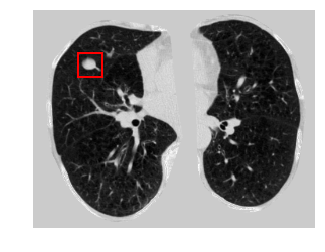

In [62]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)

In [99]:
patches.Rectangle?